<h1 style="color: #2E86C1; text-align: center; font-weight: bold;">SATISH MAHARAJ INTERVIEW</h1>

<h2 style="color: #28B463; text-align: left;">MACHINE LEARNING DEMO - LOAN ELIGIBILITY PREDICTION</h2>

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [452]:
dataset = pd.read_csv("train.csv")

In [453]:
dataset.head()

,Loan_id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001001,NaN,Yes,2,Graduate,No,2748,169.39580123297492,494.069507,360.0,1.0,Semiurban,N
1,LP001002,Female,No,3+,Graduate,No,5533,1557.365855663787,584.679519,120.0,0.0,Semiurban,N
2,LP001003,Male,No,2,Graduate,Yes,3497,3902.4785377304383,394.280091,360.0,0.0,Semiurban,N
3,LP001004,Male,No,0,Not Graduate,Yes,5187,1387.9358631470907,579.785378,180.0,1.0,Rural,N
4,LP001005,Male,No,3+,Not Graduate,No,5518,1100.4860704054854,373.758990,120.0,0.0,Semiurban,Y


In [454]:
dataset.shape

(100, 13)

In [455]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_id            100 non-null    object 
 1   Gender             95 non-null     object 
 2   Married            97 non-null     object 
 3   Dependents         97 non-null     object 
 4   Education          100 non-null    object 
 5   Self_Employed      98 non-null     object 
 6   ApplicantIncome    100 non-null    int64  
 7   CoapplicantIncome  100 non-null    object 
 8   LoanAmount         99 non-null     float64
 9   Loan_Amount_Term   99 non-null     float64
 10  Credit_History     99 non-null     float64
 11  Property_Area      100 non-null    object 
 12  Loan_Status        100 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 10.3+ KB


In [456]:
dataset.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,100.000000,99.000000,99.000000,99.000000
mean,12569.960000,501.674842,226.060606,0.515152
std,22148.563267,398.969000,91.046279,0.502314
min,1234.000000,51.520604,120.000000,0.000000
25%,3812.750000,253.921709,180.000000,0.000000
50%,5589.500000,438.885938,180.000000,1.000000
75%,8110.000000,589.390432,360.000000,1.000000
max,95994.000000,1884.998357,360.000000,1.000000


In [457]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,25,23,48
1.0,22,29,51
All,47,52,99


<Axes: >

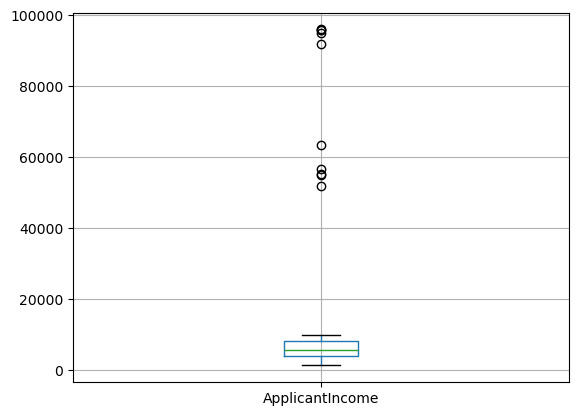

In [458]:
dataset.boxplot(column='ApplicantIncome')

<Axes: >

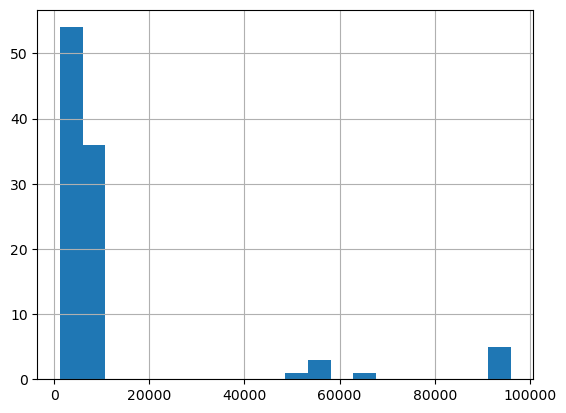

In [459]:
dataset['ApplicantIncome'].hist(bins=20)

<Axes: >

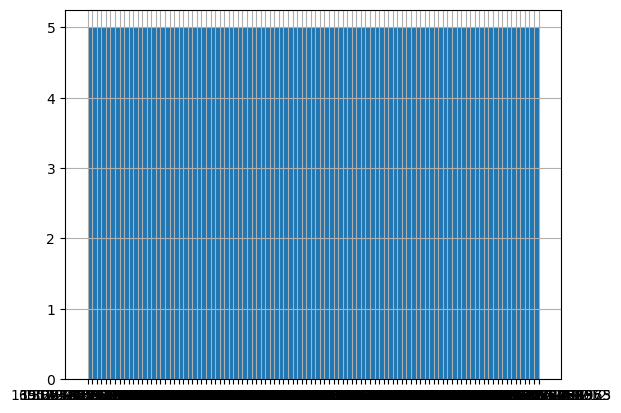

In [460]:
dataset['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

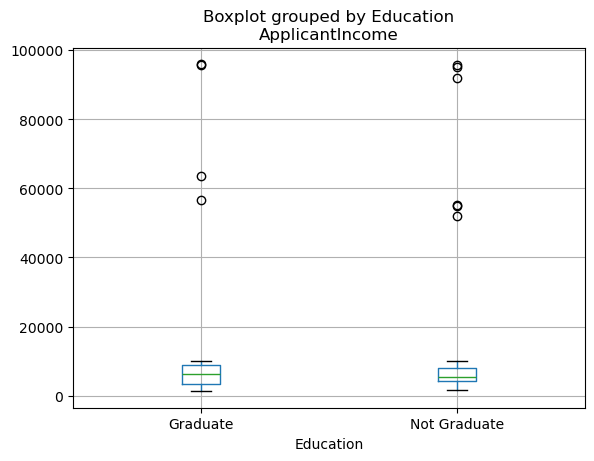

In [461]:
dataset.boxplot(column='ApplicantIncome', by='Education')

<Axes: >

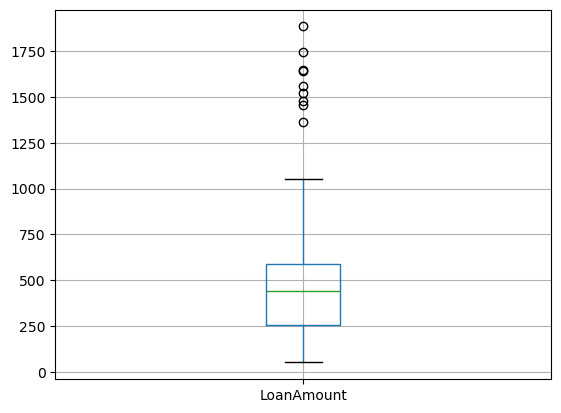

In [462]:
dataset.boxplot(column='LoanAmount')

<Axes: >

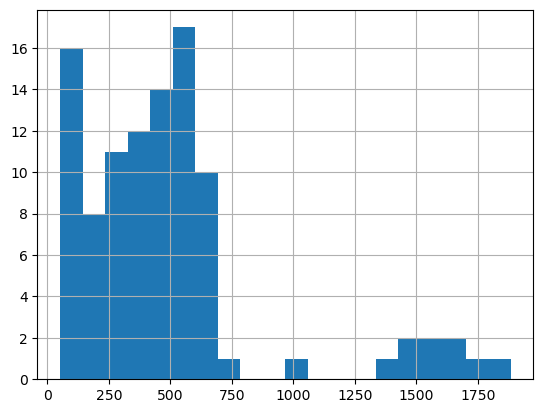

In [463]:
dataset['LoanAmount'].hist(bins=20)

<Axes: >

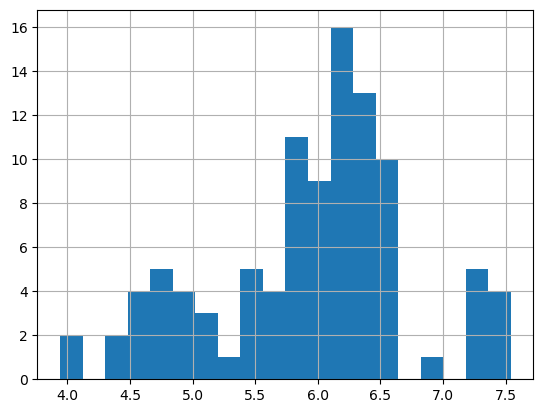

In [464]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

In [465]:
dataset.isnull().sum()

Loan_id              0
Gender               5
Married              3
Dependents           3
Education            0
Self_Employed        2
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     1
Credit_History       1
Property_Area        0
Loan_Status          0
LoanAmount_log       1
dtype: int64

In [466]:
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [467]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [468]:
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0])
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0])

In [469]:
dataset.isnull().sum()

Loan_id              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [470]:
# Convert columns to numeric, forcing errors to NaN
dataset['ApplicantIncome'] = pd.to_numeric(dataset['ApplicantIncome'], errors='coerce')
dataset['CoapplicantIncome'] = pd.to_numeric(dataset['CoapplicantIncome'], errors='coerce')

# Calculate Total Income
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'].replace(0, np.nan))

<Axes: >

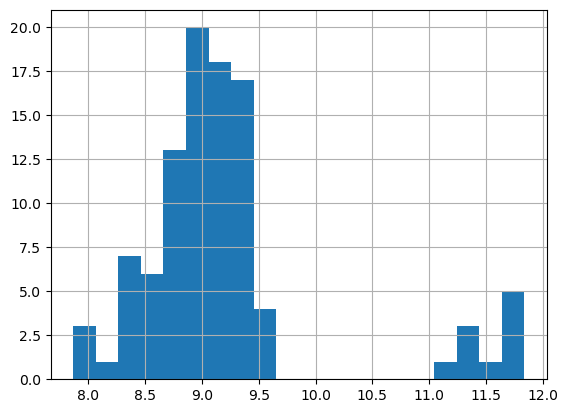

In [471]:
dataset['TotalIncome_log'].hist(bins=20)

In [472]:
dataset.head()

,Loan_id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001001,Female,Yes,2,Graduate,No,2748,169.395801,494.069507,360.0,1.0,Semiurban,N,6.202676,2917.395801,7.978447
1,LP001002,Female,No,3+,Graduate,No,5533,1557.365856,584.679519,120.0,0.0,Semiurban,N,6.371064,7090.365856,8.866492
2,LP001003,Male,No,2,Graduate,Yes,3497,3902.478538,394.280091,360.0,0.0,Semiurban,N,5.977062,7399.478538,8.909165
3,LP001004,Male,No,0,Not Graduate,Yes,5187,1387.935863,579.785378,180.0,1.0,Rural,N,6.362658,6574.935863,8.791020
4,LP001005,Male,No,3+,Not Graduate,No,5518,1100.486070,373.758990,120.0,0.0,Semiurban,Y,5.923611,6618.486070,8.797622
